<a href="https://colab.research.google.com/github/SinHarsh24/Anamoly-Detection-in-Transactions/blob/main/Anamoly_Detection_in_Transactions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Anomaly detection plays a crucial role in various businesses, especially those dealing with financial transactions, online activities, and security-sensitive operations.

# Importing the necessary Python libraries and the Dataset:



In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report

data = pd.read_csv("transaction_anomalies_dataset.csv")
data.head()

,Transaction_ID,Transaction_Amount,Transaction_Volume,Average_Transaction_Amount,Frequency_of_Transactions,Time_Since_Last_Transaction,Day_of_Week,Time_of_Day,Age,Gender,Income,Account_Type
0,TX0,1024.835708,3,997.234714,12,29,Friday,06:00,36,Male,1436074,Savings
1,TX1,1013.952065,4,1020.210306,7,22,Friday,01:00,41,Female,627069,Savings
2,TX2,970.956093,1,989.496604,5,12,Tuesday,21:00,61,Male,786232,Savings
3,TX3,1040.822254,2,969.522480,16,28,Sunday,14:00,61,Male,619030,Savings
4,TX4,998.777241,1,1007.111026,7,7,Friday,08:00,56,Female,649457,Savings


Let’s have a look if the data has any null values:

In [3]:
print(data.isnull().sum())

Transaction_ID                 0
Transaction_Amount             0
Transaction_Volume             0
Average_Transaction_Amount     0
Frequency_of_Transactions      0
Time_Since_Last_Transaction    0
Day_of_Week                    0
Time_of_Day                    0
Age                            0
Gender                         0
Income                         0
Account_Type                   0
dtype: int64


Column Insights

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction_ID               1000 non-null   object 
 1   Transaction_Amount           1000 non-null   float64
 2   Transaction_Volume           1000 non-null   int64  
 3   Average_Transaction_Amount   1000 non-null   float64
 4   Frequency_of_Transactions    1000 non-null   int64  
 5   Time_Since_Last_Transaction  1000 non-null   int64  
 6   Day_of_Week                  1000 non-null   object 
 7   Time_of_Day                  1000 non-null   object 
 8   Age                          1000 non-null   int64  
 9   Gender                       1000 non-null   object 
 10  Income                       1000 non-null   int64  
 11  Account_Type                 1000 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 93.9+ KB
None


Descriptive statistics of the data:

In [5]:
data.describe()

,Transaction_Amount,Transaction_Volume,Average_Transaction_Amount,Frequency_of_Transactions,Time_Since_Last_Transaction,Age,Income
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,1038.122511,2.498000,1000.682506,12.078000,15.341000,40.641000,8.948238e+05
std,283.580055,1.115006,20.632334,4.245225,8.361258,13.819953,3.453562e+05
min,849.024392,1.000000,939.081423,5.000000,1.000000,18.000000,3.001590e+05
25%,966.028796,1.000000,986.800556,8.000000,8.000000,29.000000,5.917308e+05
50%,1002.118678,3.000000,1000.501902,12.000000,16.000000,41.000000,8.876645e+05
75%,1033.143657,3.000000,1015.155595,16.000000,22.000000,53.000000,1.178102e+06
max,3227.459108,4.000000,1073.154036,19.000000,29.000000,64.000000,1.499670e+06


Distribution of Transaction Amount

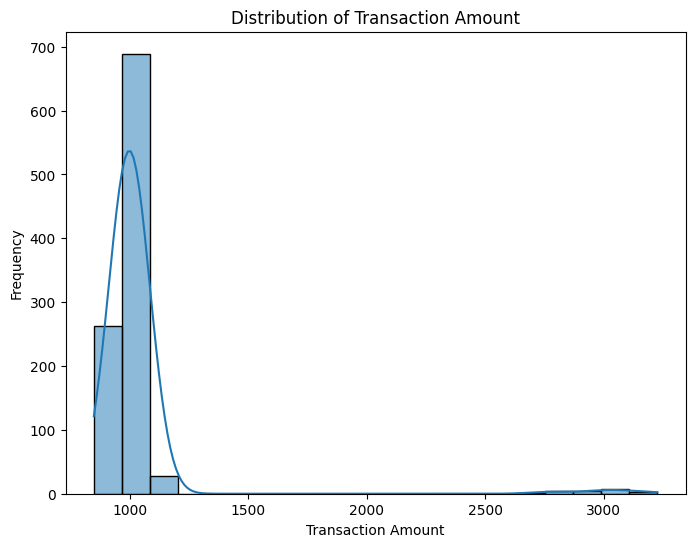

In [8]:
transaction_amount = data['Transaction_Amount']

# Create a histogram using Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(transaction_amount, bins=20, kde=True)

# Set plot labels and title
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amount')

# Show the plot
plt.show()

Transaction Amount by Account Type:

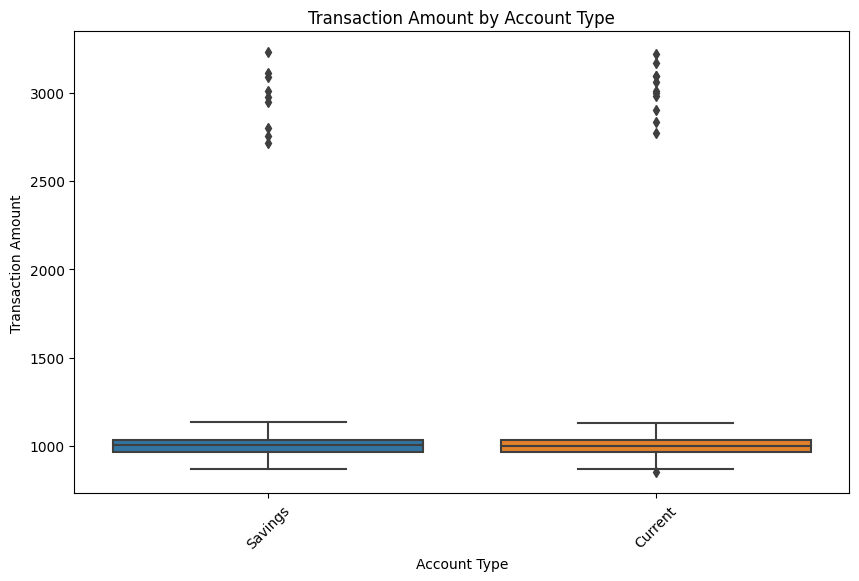

In [9]:
# Replace 'Account_Type' and 'Transaction_Amount' with your actual column names
account_type = data['Account_Type']
transaction_amount = data['Transaction_Amount']

# Create a box plot using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x=account_type, y=transaction_amount)

# Set plot labels and title
plt.xlabel('Account Type')
plt.ylabel('Transaction Amount')
plt.title('Transaction Amount by Account Type')

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Show the plot
plt.show()

Average Transaction Amount vs Age

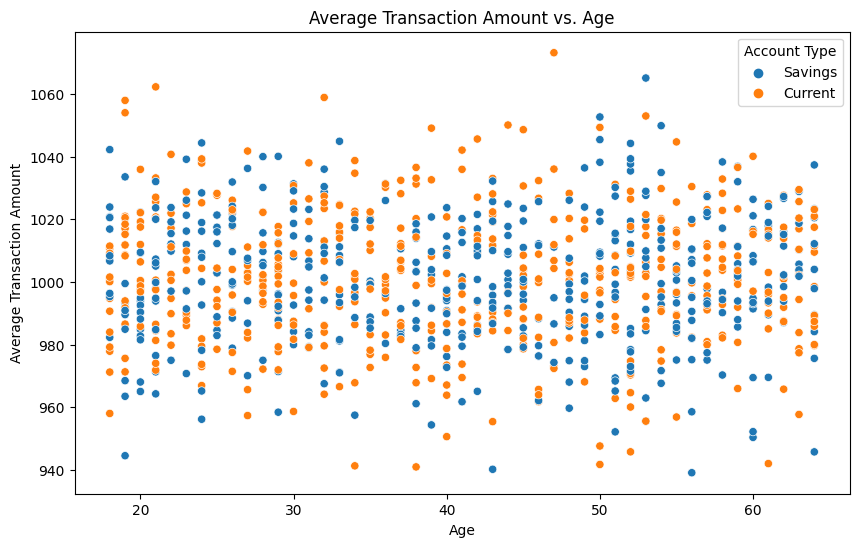

In [11]:
# Replace 'Age', 'Average_Transaction_Amount', and 'Account_Type' with your actual column names
age = data['Age']
avg_transaction_amount = data['Average_Transaction_Amount']
account_type = data['Account_Type']

# Create a scatter plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x=age, y=avg_transaction_amount, hue=account_type)

# Set plot labels and title
plt.xlabel('Age')
plt.ylabel('Average Transaction Amount')
plt.title('Average Transaction Amount vs. Age')

# Show the legend
plt.legend(title='Account Type')

# Show the plot
plt.show()

There’s no difference in the average transaction amount by age

Count of Transactions by Day of the Week

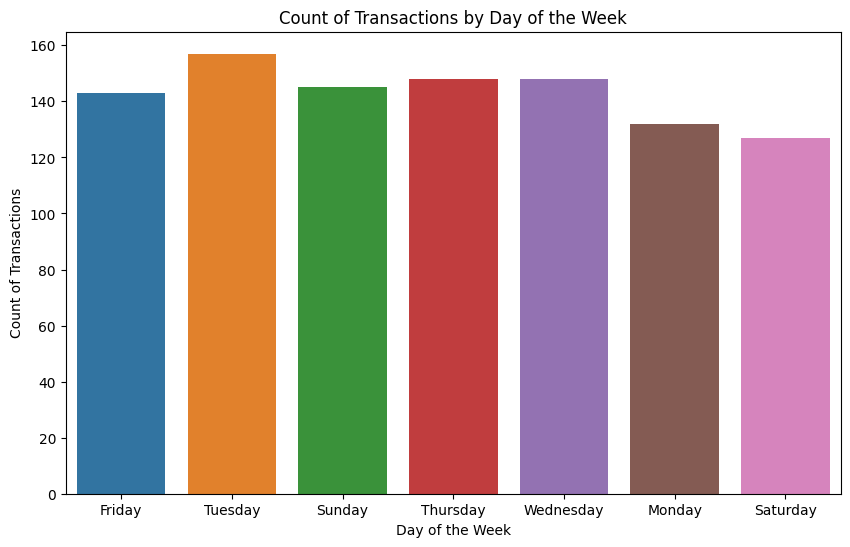

In [13]:
day_of_week = data['Day_of_Week']

# Create a countplot using Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(x=day_of_week)

# Set plot labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Count of Transactions')
plt.title('Count of Transactions by Day of the Week')

# Show the plot
plt.show()

# Correation Matrix

<ipython-input-14-d369bd21e93d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


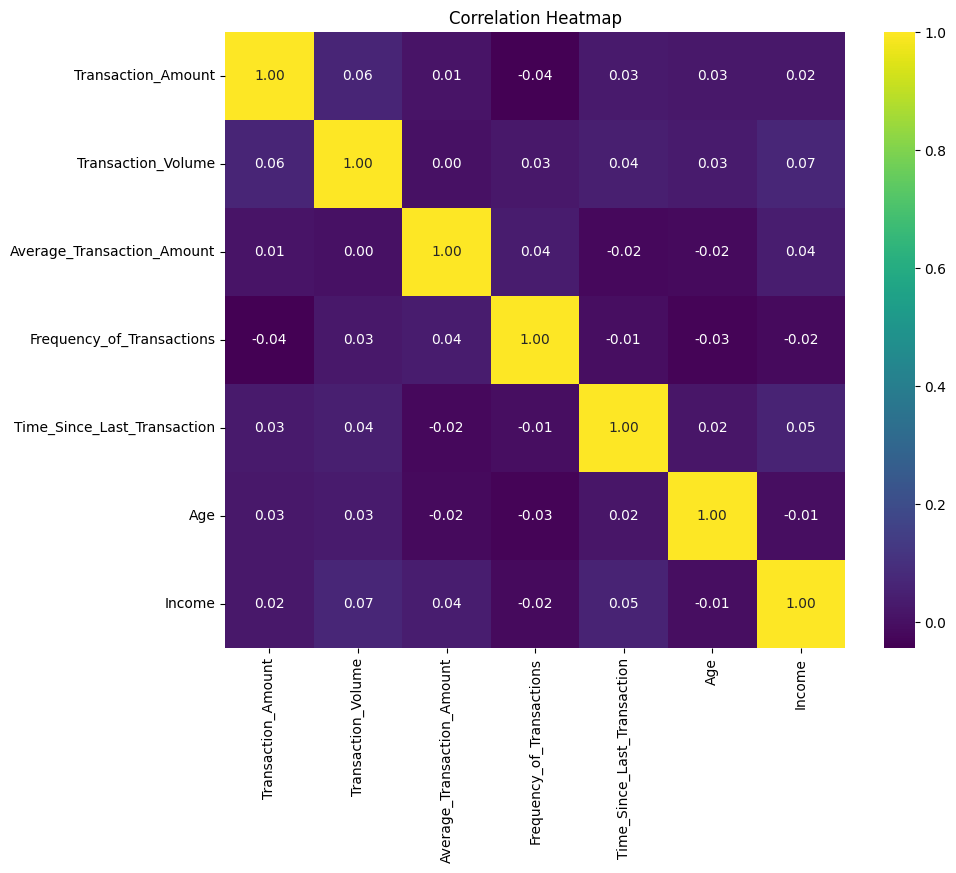

In [14]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")

# Set plot title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

# Visualization of Anomalies in the data:

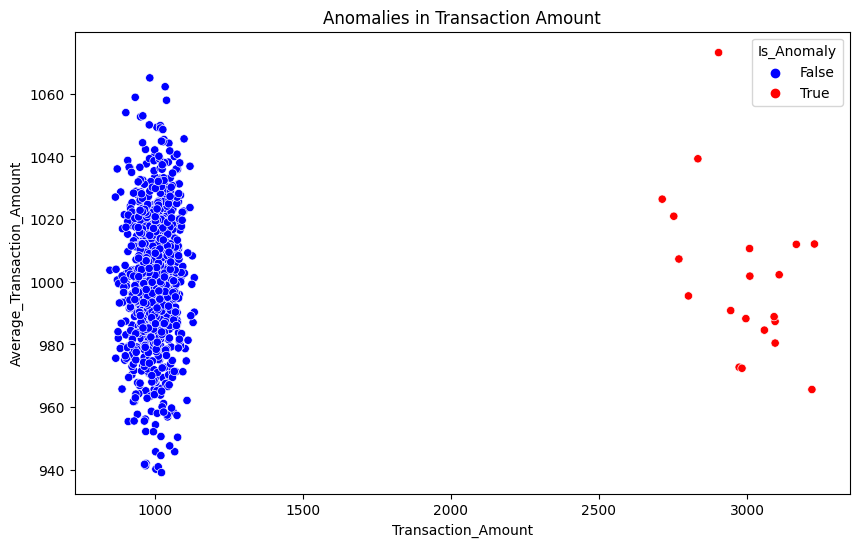

In [15]:
# Calculate mean and standard deviation of Transaction Amount
mean_amount = data['Transaction_Amount'].mean()
std_amount = data['Transaction_Amount'].std()

# Define the anomaly threshold (2 standard deviations from the mean)
anomaly_threshold = mean_amount + 2 * std_amount

# Flag anomalies
data['Is_Anomaly'] = data['Transaction_Amount'] > anomaly_threshold

# Create a scatter plot using Seaborn with anomalies highlighted
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Transaction_Amount', y='Average_Transaction_Amount', data=data, hue='Is_Anomaly', palette={False: 'blue', True: 'red'})

# Set plot title
plt.title('Anomalies in Transaction Amount')

# Show the plot
plt.show()


Calculation of the number of anomalies in the data to find the ratio of anomalies in the data, which will be useful while using anomaly detection algorithms like isolation forest:

In [16]:
# Calculate the number of anomalies
num_anomalies = data['Is_Anomaly'].sum()

# Calculate the total number of instances in the dataset
total_instances = data.shape[0]

# Calculate the ratio of anomalies
anomaly_ratio = num_anomalies / total_instances
print(anomaly_ratio)

0.02


# Machine Learning model for detecting anomalies:

In [17]:
relevant_features = ['Transaction_Amount',
                     'Average_Transaction_Amount',
                     'Frequency_of_Transactions']

# Split data into features (X) and target variable (y)
X = data[relevant_features]
y = data['Is_Anomaly']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Isolation Forest model
model = IsolationForest(contamination=0.02, random_state=42)
model.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.02, random_state=42)

Performance of this anomaly detection model:

In [18]:
# Predict anomalies on the test set
y_pred = model.predict(X_test)

# Convert predictions to binary values (0: normal, 1: anomaly)
y_pred_binary = [1 if pred == -1 else 0 for pred in y_pred]

# Evaluate the model's performance
report = classification_report(y_test, y_pred_binary, target_names=['Normal', 'Anomaly'])
print(report)

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00       196
     Anomaly       1.00      1.00      1.00         4

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



# Finally, here’s how we can use our trained model to detect anomalies:

In [19]:
# Relevant features used during training
relevant_features = ['Transaction_Amount', 'Average_Transaction_Amount', 'Frequency_of_Transactions']

# Get user inputs for features
user_inputs = []
for feature in relevant_features:
    user_input = float(input(f"Enter the value for '{feature}': "))
    user_inputs.append(user_input)

# Create a DataFrame from user inputs
user_df = pd.DataFrame([user_inputs], columns=relevant_features)

# Predict anomalies using the model
user_anomaly_pred = model.predict(user_df)

# Convert the prediction to binary value (0: normal, 1: anomaly)
user_anomaly_pred_binary = 1 if user_anomaly_pred == -1 else 0

if user_anomaly_pred_binary == 1:
    print("Anomaly detected: This transaction is flagged as an anomaly.")
else:
    print("No anomaly detected: This transaction is normal.")

Enter the value for 'Transaction_Amount': 10000
Enter the value for 'Average_Transaction_Amount': 214
Enter the value for 'Frequency_of_Transactions': 25
Anomaly detected: This transaction is flagged as an anomaly.


# Summary

So this is how we can perform anomaly detection in transactions using Machine Learning and Python. Anomaly detection in transactions means identifying unusual or unexpected patterns within transactions or related activities. These patterns, known as anomalies or outliers, deviate significantly from the expected norm and could indicate irregular or fraudulent behaviour.